# 필요한 라이브러리

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm 
from konlpy.tag import Okt # 형태소 분석기 Okt
from konlpy.tag import Hannanum
from wordcloud import WordCloud
from collections import Counter

In [4]:
!pip install konlpy wordcloud


[notice] A new release of pip available: 22.2 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


# 저장한 리뷰 정보 불러오기

In [5]:
import os
print(os.getcwd()) # 현재 경로 확인

c:\Users\maeve\AIB 14\Section6\Codestates Project 1


In [6]:
df = pd.read_csv('appstore_1505449642.csv', encoding = 'utf-8-sig')
df

,USER,DATE,STAR,LIKE,TITLE,REVIEW
0,롸롸롸유료맴붜,2022-10-19 12:47:29-07:00,4,0,왜 갑자기 유료로 바뀐걸까요,ㅠㅠㅠ원래 사진만찍어도 됬눈뎁 ㅠㅠㅠㅠ\n유료로 바껴버렸군요 ㅠㅠㅠㅠㅠ
1,스물다섯번,2022-10-05 01:26:55-07:00,5,0,기록하기 편하고 재미있어요,기록 꾸준히 못하는데 꽤 오래 쓰고 있어요 자동완성 기능이 은근 편하더라고요 피드백...
2,맛초롱,2022-10-03 21:13:52-07:00,5,0,많은 사람들이 사용했으면 좋겠어요!,"사진과 텍스트 모두 사용가능한 게 큰 장점이고, 다른 무료 앱들은 클릭 한 번만 해..."
3,밍밍함,2022-09-21 16:16:02-07:00,5,0,굳굳,좋아요
4,배고픈올라프,2022-09-20 10:22:37-07:00,5,0,솔직히? 이건 써야한다,진짜 귀여운 앱. 식단기록 귀찮은 사람들이 적당히 동기부여 받으면서 꾸준히 건강관리...
...,...,...,...,...,...,...
207,시프넬,2020-08-05 05:01:05-07:00,5,0,리뷰 잘 안다는데,사용해보니 진짜 좋네요. 검색해보니 스타트업으로 회사도 차리셨다고.. 응원합니다 좋...
208,평생다이어터365,2020-08-01 03:49:19-07:00,5,0,이 앱이 제일 괜찮은듯,탈퇴했다가 이 앱이 제일 괜찮아서 다시 사용하려니 안되요 2주가 지나도 안되요
209,응이거아니야,2020-07-20 03:29:21-07:00,2,0,계정 연동 다양성,구글 아니어도 카카오나 네이버 등 다양하게 앱에 연결할 수 있는 방법이 있음 좋겠어요ㅠㅠ
210,lee_comet,2020-07-18 19:27:09-07:00,5,0,정말 감사함 뿐..,"어떤 것을 먹었던지 칼로리, 탄단지 다 계산해주시고 피드백도 즉각 반영해주셔서 너무..."


In [7]:
print(df.REVIEW.nunique())

212


In [8]:
# 형태소 분석
tokenizer = Okt()
df['tokenized'] = df['REVIEW'].apply(tokenizer.nouns)

In [9]:
df.head()

,USER,DATE,STAR,LIKE,TITLE,REVIEW,tokenized
0,롸롸롸유료맴붜,2022-10-19 12:47:29-07:00,4,0,왜 갑자기 유료로 바뀐걸까요,ㅠㅠㅠ원래 사진만찍어도 됬눈뎁 ㅠㅠㅠㅠ\n유료로 바껴버렸군요 ㅠㅠㅠㅠㅠ,"[원래, 사진, 됬눈뎁, 유료, 바]"
1,스물다섯번,2022-10-05 01:26:55-07:00,5,0,기록하기 편하고 재미있어요,기록 꾸준히 못하는데 꽤 오래 쓰고 있어요 자동완성 기능이 은근 편하더라고요 피드백...,"[기록, 꽤, 자동, 완성, 기능, 은근, 피드백, 좀, 꽤, 헬스, 기록, 앱, ..."
2,맛초롱,2022-10-03 21:13:52-07:00,5,0,많은 사람들이 사용했으면 좋겠어요!,"사진과 텍스트 모두 사용가능한 게 큰 장점이고, 다른 무료 앱들은 클릭 한 번만 해...","[사진, 텍스트, 모두, 사용, 게, 장점, 다른, 무료, 앱, 클릭, 번만, 해도..."
3,밍밍함,2022-09-21 16:16:02-07:00,5,0,굳굳,좋아요,[]
4,배고픈올라프,2022-09-20 10:22:37-07:00,5,0,솔직히? 이건 써야한다,진짜 귀여운 앱. 식단기록 귀찮은 사람들이 적당히 동기부여 받으면서 꾸준히 건강관리...,"[진짜, 앱, 식단, 기록, 사람, 동기부여, 건강, 관리, 수, 앱, 인간, 지능..."


In [10]:
# 긍정 리뷰와 부정 리뷰들을 분리
df['label'] = np.select([df.STAR > 3], [1], default=0)
df.head()

,USER,DATE,STAR,LIKE,TITLE,REVIEW,tokenized,label
0,롸롸롸유료맴붜,2022-10-19 12:47:29-07:00,4,0,왜 갑자기 유료로 바뀐걸까요,ㅠㅠㅠ원래 사진만찍어도 됬눈뎁 ㅠㅠㅠㅠ\n유료로 바껴버렸군요 ㅠㅠㅠㅠㅠ,"[원래, 사진, 됬눈뎁, 유료, 바]",1
1,스물다섯번,2022-10-05 01:26:55-07:00,5,0,기록하기 편하고 재미있어요,기록 꾸준히 못하는데 꽤 오래 쓰고 있어요 자동완성 기능이 은근 편하더라고요 피드백...,"[기록, 꽤, 자동, 완성, 기능, 은근, 피드백, 좀, 꽤, 헬스, 기록, 앱, ...",1
2,맛초롱,2022-10-03 21:13:52-07:00,5,0,많은 사람들이 사용했으면 좋겠어요!,"사진과 텍스트 모두 사용가능한 게 큰 장점이고, 다른 무료 앱들은 클릭 한 번만 해...","[사진, 텍스트, 모두, 사용, 게, 장점, 다른, 무료, 앱, 클릭, 번만, 해도...",1
3,밍밍함,2022-09-21 16:16:02-07:00,5,0,굳굳,좋아요,[],1
4,배고픈올라프,2022-09-20 10:22:37-07:00,5,0,솔직히? 이건 써야한다,진짜 귀여운 앱. 식단기록 귀찮은 사람들이 적당히 동기부여 받으면서 꾸준히 건강관리...,"[진짜, 앱, 식단, 기록, 사람, 동기부여, 건강, 관리, 수, 앱, 인간, 지능...",1


In [11]:
df['label'].value_counts() # 긍/부정 리뷰 수

1    187
0     25
Name: label, dtype: int64

In [12]:
# 긍정, 부정 리뷰 구분
positive_reviews = np.hstack(df[df['label']==1]['tokenized'].values)
negative_reviews = np.hstack(df[df['label']==0]['tokenized'].values)

In [13]:
# 파이썬의 Counter()는 입력된 파이썬의 리스트로부터 각 단어의 등장 빈도수를 카운트
# 긍정 리뷰에서 등장한 상위 20개의 단어들만 출력해봅시다.

positive_reviews_word_count = Counter(positive_reviews)
print(positive_reviews_word_count.most_common(20))

[('어플', 92), ('칼로리', 92), ('식단', 86), ('앱', 85), ('기록', 69), ('계산', 61), ('사진', 56), ('것', 51), ('사용', 41), ('입력', 39), ('관리', 38), ('수', 37), ('이', 32), ('때', 28), ('진짜', 27), ('더', 27), ('기능', 26), ('음식', 26), ('스프린트', 25), ('다이어트', 25)]


In [14]:
# 부정 리뷰에서 등장한 상위 20개의 단어들만 출력해봅시다.

negative_reviews_word_count = Counter(negative_reviews)
print(negative_reviews_word_count.most_common(20))

[('칼로리', 18), ('오류', 11), ('다시', 9), ('때', 9), ('사용', 9), ('사진', 9), ('것', 8), ('앱', 8), ('계속', 8), ('식단', 7), ('기록', 7), ('서비스', 6), ('업데이트', 6), ('안', 5), ('계산', 5), ('전', 5), ('입력', 5), ('삭제', 5), ('그냥', 4), ('어플', 4)]


In [17]:
df.DATE.dtype

dtype('O')

In [24]:
# 서비스 유료화 이후 고객 긍정 리뷰
df[(df.DATE.str.contains('2022-07'))&(df.label == 1)].REVIEW

15    너무 잘쓰고있습니다 벌써 영업 3명정도했어요 ㅎㅎ 애플워치랑도 연동되면 좋겟네요 ㅠ...
16    -매니저님 식단을 작성해주셨다는 알림이 뜰때마다 너무 재밌어요! ㅋㅋㅋㅋㅋㅋ 제가 ...
17                                                 살빼자!
18    예전 무료로 사용할 수 있던게 장점이었든 스플린트가 기능들이 죄다 멤버십으로 바껴서...
19    한달에 오천원정도만해도 괜찮을 것 같은데 구천원은 솔직히 너무 비싼 것 같고 아예 ...
20    최강 편리한 UX, 최고 빠른 분석, 다른 식단 관리 앱을 쓰고픈 마음이 전혀 들지...
22    여러 식단관리 어플 써봤지만 이렇게 만족도가 높은 어플은 없었어요 ㅎㅎ 오늘부터 스...
23      기다리는동안 5키로 쪘어요🫠\n하지만 괜찮아요 \n스프린트와 함께 6키로 뺄거니까~🤭
Name: REVIEW, dtype: object

In [25]:
df[(df.DATE.str.contains('2022-08'))&(df.label == 1)].REVIEW

8                                         계속 로딩중이네요 몇일째
10    본사가 충청도 인가요? 오늘부터 어플이 안됨.. 서버가 잠긴건가요? 모두 안전하길 ...
13        아무렇게나 작성해도 잘 적용되네요. \n애플 건강과 연동되면 좋을 것 같아요 ㅎㅎ
14    예전에 무료일때 써보고 마음에 들어 계속 쓰다가 잠시 중단되서 슬펐는데 다시 출시되...
Name: REVIEW, dtype: object

In [26]:
df[(df.DATE.str.contains('2022-09'))&(df.label == 1)].REVIEW

3                                                  좋아요
4    진짜 귀여운 앱. 식단기록 귀찮은 사람들이 적당히 동기부여 받으면서 꾸준히 건강관리...
5    어플 리뷰는 처음 써보는데 건강 관리할 때 좋아요 저 뿐만 아니라 엄마 아빠가 쓰실...
7    바로 결제했어용 돈이 안아깝다!!!! 귀차니즘심한사람들 기록 외주두고싶다고 늘 그생...
Name: REVIEW, dtype: object

In [27]:
df[(df.DATE.str.contains('2022-10'))&(df.label == 1)].REVIEW

0              ㅠㅠㅠ원래 사진만찍어도 됬눈뎁 ㅠㅠㅠㅠ\n유료로 바껴버렸군요 ㅠㅠㅠㅠㅠ
1    기록 꾸준히 못하는데 꽤 오래 쓰고 있어요 자동완성 기능이 은근 편하더라고요 피드백...
2    사진과 텍스트 모두 사용가능한 게 큰 장점이고, 다른 무료 앱들은 클릭 한 번만 해...
Name: REVIEW, dtype: object

In [28]:
df[(df.DATE.str.contains('2022-11'))&(df.label == 1)].REVIEW

Series([], Name: REVIEW, dtype: object)

In [29]:
df[(df.DATE.str.contains('2022-12'))&(df.label == 1)].REVIEW

Series([], Name: REVIEW, dtype: object)

In [31]:
# 서비스 유료화 이후 고객 부정 리뷰
df[(df.DATE.str.contains('2022-07'))&(df.label == 0)].REVIEW

21    갑자기 사용자 많다고 서비스 중단한것도 황당했는데 썼을때 기억이 좋아서 멤버쉽 6개...
Name: REVIEW, dtype: object

In [32]:
df[(df.DATE.str.contains('2022-08'))&(df.label == 0)].REVIEW

9     결론부터 말하자면 유료 구독인데 서비스는 실망입니다\n\n기존 무료일때부터 잘 사용...
11     저녁 시간때부터 접속이 안되는데 subscription 어제 했는데 이게 무슨 일인가요
12    개편 전부터 사용해왔는데 개편 전에는 매니저님께서 칼로리 분석해주시는 서비스를 무료...
Name: REVIEW, dtype: object

In [33]:
df[(df.DATE.str.contains('2022-09'))&(df.label == 0)].REVIEW

6    사람이 하는건데 한달에 9000원이나 받아가면서 그냥 네이버에 치기만 해도 나오는 ...
Name: REVIEW, dtype: object

In [34]:
df[(df.DATE.str.contains('2022-10'))&(df.label == 0)].REVIEW

Series([], Name: REVIEW, dtype: object)

In [17]:
import matplotlib.font_manager as fm

fontpath = r'C:\Users\Public\fonts\NanumSquareL.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
# plt.rc('font', family='나눔스퀘어') 
# fm._rebuild()

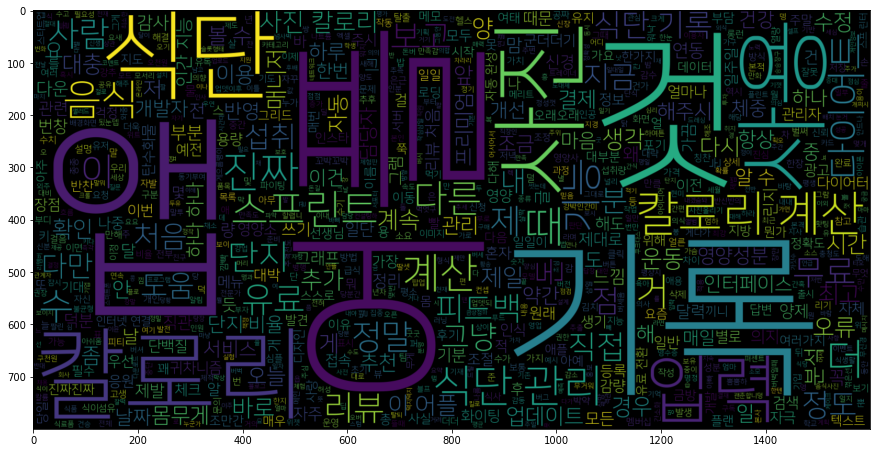

In [18]:
# 긍정 리뷰의 워드 클라우드
plt.figure(figsize = (15,15))
temp_data = ' '.join(np.concatenate(df[df['label']==1].tokenized.reset_index(drop=True)))
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800, font_path = fontpath).generate(temp_data)
plt.imshow(wc, interpolation = 'bilinear')

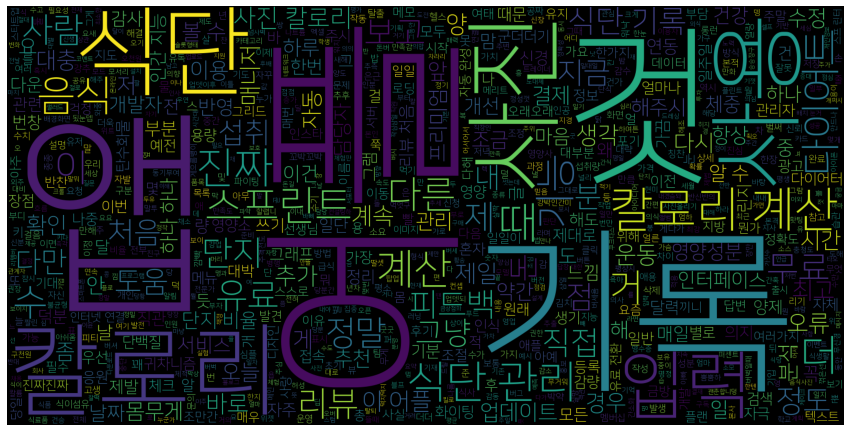

In [19]:
plt.imshow(wc) 

figure = plt.gcf() # get current figure
figure.set_size_inches(15, 15)
plt.axis('off') 
plt.show()
# [출처] [파이썬 시각화] 1. 카톡 데이터로 워드 클라우드 그리기|작성자 러닝머신

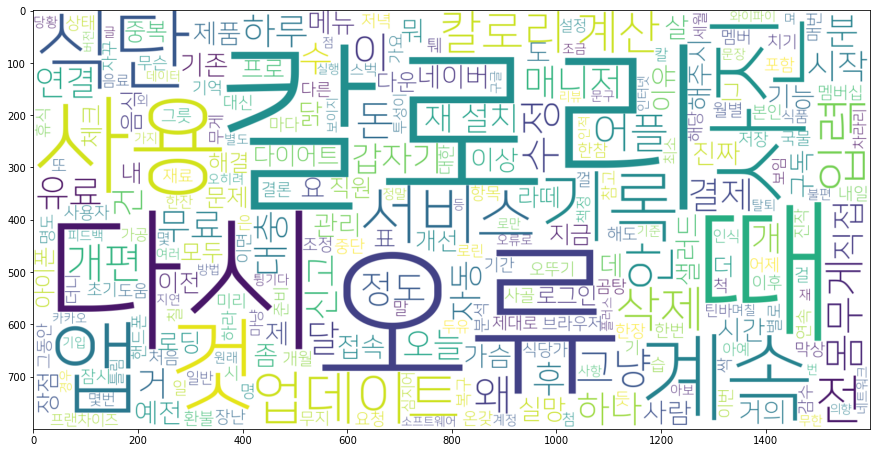

In [20]:
# 부정 리뷰의 워드 클라우드
plt.figure(figsize = (15,15))
temp_data = ' '.join(np.concatenate(df[df['label']==0].tokenized.reset_index(drop=True)))
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800, font_path = fontpath, background_color='white').generate(temp_data)
plt.imshow(wc, interpolation = 'bilinear')

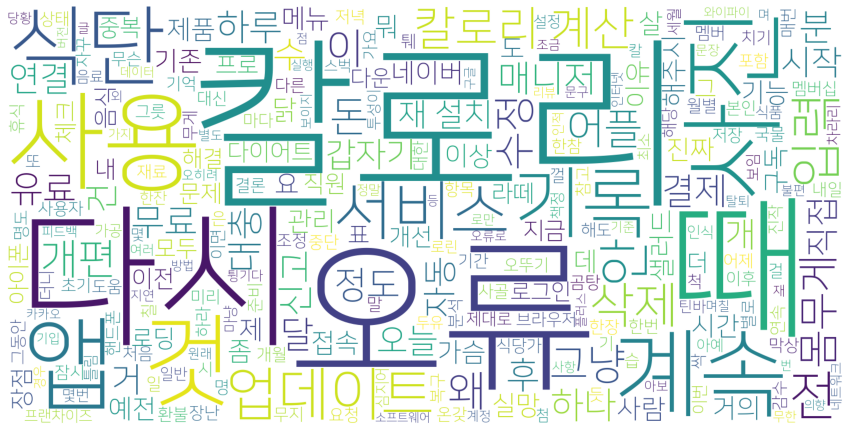

In [21]:
plt.imshow(wc) 

figure = plt.gcf() # get current figure
figure.set_size_inches(15, 15)
plt.axis('off') 
plt.show()
# [출처] [파이썬 시각화] 1. 카톡 데이터로 워드 클라우드 그리기|작성자 러닝머신
